# MOVIE GENRE -LSTM

Using LSTM (Long Short-Term Memory) for movie genre classification involves training a deep learning model capable of understanding the sequential nature of movie plots and their corresponding genres, enabling accurate classification based on the temporal dependencies within the text data. By leveraging LSTM's ability to capture long-range dependencies, the model can effectively learn the underlying patterns in movie synopses, facilitating genre prediction with improved accuracy.

Import Necessary Libraries

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Read the dataset

In [387]:
import csv

try:
    df = pd.read_csv('movie_data.csv')
except pd.errors.ParserError:
    with open('movie_data.csv', 'r', errors='ignore') as file:
        reader = csv.reader(file)
        df = pd.DataFrame(reader)

In [388]:
df.head()

,0,1
0,review,sentiment
1,This movie is just crap. Even though the direc...,0
2,Another detailed work on the subject by Dr Dwi...,1
3,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
4,"Like with any movie genre, there are good gang...",0


In [389]:
df['review']=df[0]

In [390]:
df['sentiment']=df[1]

In [391]:
df.drop(columns=[0,1],inplace=True)

In [392]:
df.head()

,review,sentiment
0,review,sentiment
1,This movie is just crap. Even though the direc...,0
2,Another detailed work on the subject by Dr Dwi...,1
3,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
4,"Like with any movie genre, there are good gang...",0


In [393]:
df=df.drop(0)

In [394]:
df.head()

,review,sentiment
1,This movie is just crap. Even though the direc...,0
2,Another detailed work on the subject by Dr Dwi...,1
3,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
4,"Like with any movie genre, there are good gang...",0
5,I watched it with my mom and we were like...<b...,0


Print some of the review along with its sentiment

In [395]:
for i in range(1,10):
    print(df['review'][i],'-', df['sentiment'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃƒÂ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃƒÂ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German 

View info

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15773 entries, 1 to 15773
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     15773 non-null  object
 1   sentiment  15772 non-null  object
dtypes: object(2)
memory usage: 246.6+ KB


drop null values

In [397]:
df.isna().sum()

review       0
sentiment    1
dtype: int64

In [398]:
df=df.dropna()

In [399]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

View basic statistical information about the dataset

In [400]:
df.describe()

,review,sentiment
count,15772,15772
unique,15739,2
top,"The movie was excellent, save for some of the ...",1
freq,2,7941


check for duplicated values

In [401]:
df.duplicated().sum()

33

In [402]:
df.drop_duplicates(inplace= True, keep = 'first')

In [403]:
df.duplicated().sum()

0

Plot a countplot of 'sentiment'

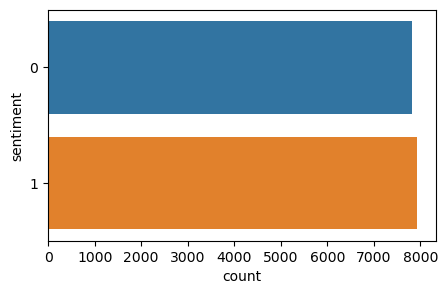

In [404]:
plt.figure(figsize = (5,3))
sns.countplot(y = df['sentiment'])
plt.show()

Create a function to preprocess the text

In [405]:
import re
from nltk.stem import WordNetLemmatizer

In [406]:
def preprocess(sentence):
    sentence=sentence.lower()
    text=re.sub(r'[^0-9a-zA-Z]',' ',sentence).split()
    lemma=WordNetLemmatizer()
    text=[lemma.lemmatize(word,'v') for word in text]
    return ' '.join(text)

 Apply the function on review column

In [407]:
df['review'] = df['review'].apply(preprocess)

Print some of the texts after the preprocess

In [408]:
for i in range(1,10):
    print(df['review'][i])
    print()

this movie be just crap even though the directors claim to be part of that oi culture it s still a very very bad directorial debut the topic itself be very interest and i accept the bad act due to the fact that they be all amateurs and never act before but the worst thing about this film be the dialogs and very unexperienced and naive direct there s no time at all in that movie i felt like the directors be so exit to do that movie it s their first feature that they actually never really ask themselves what story they wanna tell i meet ben one of the directors on several occasion and he s a nice and thoughtful guy but that doesn t make him a director i think that american history x be full of clich s but somehow manage to transport a story oi warn be full of clich s doesn t tell anything new or provocative and that s the sad thing about this movie it s far from any oi reality br br if you wanna see weird but great german film watch the movies of michael haneke christoph schlingensief os

Split the dataset into Input and Target Variables

In [409]:
X = df['review']
y = df['sentiment']

One Hot encode the Target variables

In [410]:
from sklearn.preprocessing import LabelBinarizer

In [411]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [412]:
y.shape

(15739, 1)

In [413]:
y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

Split the dataset into Training and Testing Set

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Convert text to Sequence and add padding

In [415]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [416]:
tokenizer = Tokenizer(num_words=128)

In [417]:
tokenizer.fit_on_texts(X)

In [418]:
tokenizer.word_index

{'the': 1,
 'be': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'br': 7,
 'it': 8,
 'in': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 's': 13,
 'have': 14,
 'film': 15,
 'as': 16,
 'movie': 17,
 'for': 18,
 'with': 19,
 'but': 20,
 'you': 21,
 't': 22,
 'on': 23,
 'not': 24,
 'he': 25,
 'his': 26,
 'one': 27,
 'do': 28,
 'at': 29,
 'all': 30,
 'make': 31,
 'they': 32,
 'by': 33,
 'like': 34,
 'an': 35,
 'who': 36,
 'see': 37,
 'so': 38,
 'from': 39,
 'there': 40,
 'get': 41,
 'her': 42,
 'or': 43,
 'out': 44,
 'just': 45,
 'about': 46,
 'if': 47,
 'time': 48,
 'what': 49,
 'some': 50,
 'good': 51,
 'can': 52,
 'character': 53,
 'when': 54,
 'watch': 55,
 'go': 56,
 'more': 57,
 'she': 58,
 'very': 59,
 'up': 60,
 'even': 61,
 'no': 62,
 'my': 63,
 'would': 64,
 'think': 65,
 'really': 66,
 'only': 67,
 'which': 68,
 'story': 69,
 'their': 70,
 'show': 71,
 'well': 72,
 'we': 73,
 'me': 74,
 'look': 75,
 'much': 76,
 'than': 77,
 'know': 78,
 'end': 79,
 'say': 80,
 'will': 81,
 'people': 82,

In [419]:
vocab_size = len(tokenizer.word_index) + 1

In [420]:
def text_encoding(txt):
    encoded_docs=tokenizer.texts_to_sequences(txt)
    padded_sequences=pad_sequences(encoded_docs,maxlen=128)
    return padded_sequences

Apply the function on both Training and Testing set

In [421]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [422]:
X_train.shape

(12591, 128)

In [423]:
X_test.shape

(3148, 128)

In [424]:
y_train.shape

(12591, 1)

In [425]:
y_test.shape

(3148, 1)

In [359]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

Create a keras Sequential model with LSTM Layers

In [360]:
vocab_size

53395

In [361]:
from keras import Sequential
from keras import layers

In [374]:
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_38 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_39 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [375]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model with our Training Set

In [376]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 230s 691ms/step - accuracy: 0.5853 - loss: 0.6684 - val_accuracy: 0.7023 - val_loss: 0.5714
Epoch 2/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 215s 682ms/step - accuracy: 0.7235 - loss: 0.5543 - val_accuracy: 0.7130 - val_loss: 0.5600
Epoch 3/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 219s 695ms/step - accuracy: 0.7345 - loss: 0.5412 - val_accuracy: 0.7142 - val_loss: 0.5572
Epoch 4/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 207s 656ms/step - accuracy: 0.7499 - loss: 0.5291 - val_accuracy: 0.7217 - val_loss: 0.5641
Epoch 5/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 208s 661ms/step - accuracy: 0.7490 - loss: 0.5184 - val_accuracy: 0.7312 - val_loss: 0.5434
Epoch 6/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 205s 652ms/step - accuracy: 0.7613 - loss: 0.5054 - val_accuracy: 0.7332 - val_loss: 0.5445
Epoch 7/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 206s 655ms/step - accuracy: 0.7669 - loss: 0.4948 - val_accuracy: 0.7324 - val_loss: 0.5466
Epoch 8/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 206s 654ms/step - accuracy: 0.7637 -

Make Prediction with X_test

In [426]:
y_pred=model.predict(X_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 66s 665ms/step


In [427]:
y_pred

array([[0.7434118 ],
       [0.38721845],
       [0.816428  ],
       ...,
       [0.46313745],
       [0.03236397],
       [0.93439716]], dtype=float32)

In [431]:
def convert_to_class(y_pred):
    class_labels = []
    for i in y_pred:
        if i < 0.5:
            class_labels.append(0)
        else:
            class_labels.append(1)
    return class_labels

In [439]:
predicted_classes = convert_to_class(y_pred)

Accuracy score,confusion_matrix,classification_report

In [380]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy_score

In [435]:
accuracy_score(y_test,predicted_classes)

0.783989834815756

confusion_matrix

<Axes: >

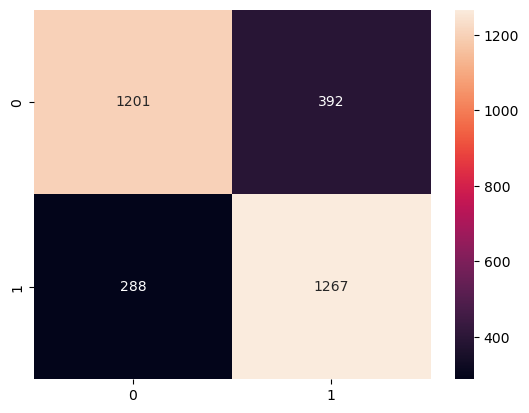

In [436]:
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True,fmt='d')

classification_report

In [438]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1593
           1       0.76      0.81      0.79      1555

    accuracy                           0.78      3148
   macro avg       0.79      0.78      0.78      3148
weighted avg       0.79      0.78      0.78      3148

